# BISECTING AND OUTLIER DETECTION

In [ ]:
!pip install --upgrade scikit-learn
from sklearn.cluster import KMeans
!pip install pyreadr
import pyreadr
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 361 kB 4.7 MB/s 


In [ ]:
data = pyreadr.read_r('/content/syntdata1.RDS')
df = data[None]
df

,0,1
0,10.268548,5.160963
1,10.171765,4.608081
2,10.218156,5.787864
3,10.231643,5.321450
4,10.220213,5.044880
...,...,...
146,10.901687,5.833739
147,10.797328,6.862563
148,10.870361,6.097340
149,10.702861,4.374383


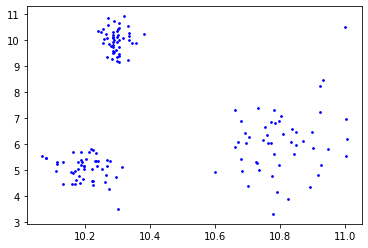

In [ ]:
plt.scatter(df[0], df[1], s=3, c='blue')

Dataset normalisation

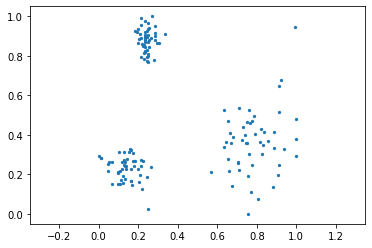

In [ ]:
from sklearn import preprocessing
import pandas as pd

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
plt.scatter(df_scaled[0].values, df_scaled[1].values, s=5)
plt.axis('equal')
plt.show()

## BISECTING KMEANS
#####The BisectingKMeans is an iterative variant of KMeans, using **divisive hierarchical clustering**. Instead of creating all centroids at once, centroids are picked progressively based on a previous clustering: a cluster is split into two new clusters repeatedly until the target number of clusters is reached.

In [ ]:
#from sklearn.cluster import BisectingKMeans

The SSE (or SSQ) is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.
SSE is calculated by squaring each points distance to its respective clusters centroid and then summing everything up. So at the end I should have SSE for each k value.

In [ ]:
def SSQ(X, kmeans):
    centers = kmeans.cluster_centers_
    ssq = np.zeros(len(centers)) #Return a new array of given shape and type, filled with zeros.
    for cc in range(len(centers)):
        mask = (kmeans.labels_ == cc)
        ssq[cc] += np.square(X.iloc[mask].values - centers[cc]).sum()
    return ssq

[11.374593377079584, 1.8764122699478565]
1 [0.20879771 0.36539676] [1.8764122699478565, 0.20879770575776788, 0.36539675738431315]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
0
2 [0.28416623 0.88942863] [0.20879770575776788, 0.36539675738431315, 0.2841662338576145, 0.8894286262097288]
here 2 0.8894286262097288 0.8894286262097288
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 0 0 3 3 0 3 3 0
 0 0 3 0 0 0 0 3 0 0 0 0 0 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 0 3 0 3 0 3 0 0 0
 0 3 0]
3
3 [0.0582571  0.45196581] [0.20879770575776788, 0.36539675738431315, 0.2841662338576145, 0.05825

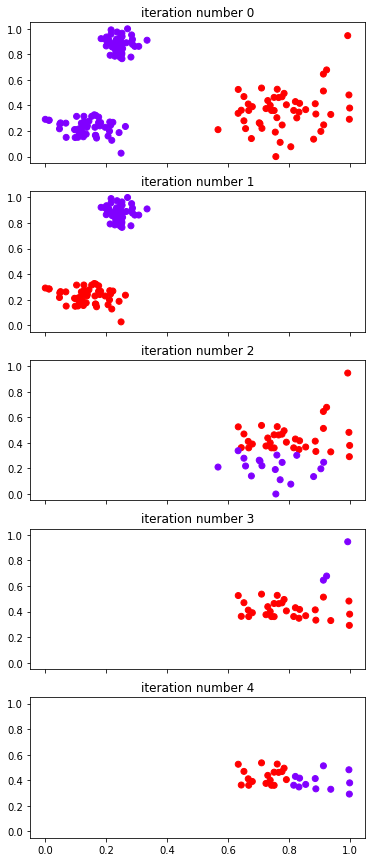

In [ ]:
max_iter = 5    # number of clusters at the end
indexes = np.zeros(len(df[0]))  # indexes set: the data to work on for clustering
h_cluster = [] # cluster hierarchy
ssq = [] # ssq, each iteration it will focus on the cluster with the highest ssq 
ix_cluster = 0 # index of the cluster that will be splitted
seed     = 123 # seed for kmeans
fig, axs = plt.subplots(max_iter, sharex=True, sharey=True, figsize = (6,max_iter*3))

res = KMeans(n_clusters=2).fit(df_scaled)
ssq.extend(SSQ(df_scaled, res))
print(ssq)
worst = np.argmax(ssq)
ssq.pop(worst)
mask = (res.labels_ == worst)
indexes = res.labels_ if worst==0 else - res.labels_ + 1
ix = 1
#print(indexes)
axs[0].scatter(df_scaled[0].values, df_scaled[1].values, c=res.labels_, cmap='rainbow')
axs[0].set_title('iteration number 0')
ii = 1
while(ii < max_iter):
    x = df_scaled.iloc[mask]
    res = KMeans(n_clusters=2, random_state=seed).fit(x)
    bad = np.argmax(SSQ(x, res))
    ssq.extend(SSQ(x, res))
    print(ii, SSQ(x, res), ssq)
    worst = np.argmax(ssq)
    tmp_label = np.zeros(len(res.labels_))
    tmp_label[np.where(res.labels_ != bad)[0]] = ii +1
    if max(ssq) == max(SSQ(x, res)):
        print('here', ii, max(ssq), max(SSQ(x, res)))
        tmp_label[np.where(res.labels_ == bad)[0]] = 0 
        indexes[mask] = tmp_label
    else:
        tmp_label[np.where(res.labels_ == bad)[0]] = ix
        indexes[np.where(indexes == ix)[0]] = 0
        indexes[mask] = tmp_label
    mask = (indexes == 0)
    ssq.pop(worst)
    print(indexes)
    print(worst)
    axs[ii].scatter(x[0], x[1], c=res.labels_, cmap='rainbow')
    axs[ii].set_title('iteration number ' + str(ii))
    ii += 1

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=seed).fit(df_scaled)
#ssq.append(SSQ(df_scaled, res))
centers = kmeans.cluster_centers_
ssq = np.zeros(len(centers))
for cc in range(len(centers)):
    mask = (kmeans.labels_ == cc)
    print(centers[cc])
    ssq[cc] += np.square(df_scaled.iloc[mask].values - centers[cc]).sum()
    print(ssq)

[0.78562108 0.36280449]
[1.87641227 0.        ]
[0.19137907 0.55460423]
[ 1.87641227 11.37459338]


##DISTANCE BASED ANOMALY DETECTION

In [ ]:
from sklearn.neighbors import NearestNeighbors

distances
       0         1         2         3         4
0    0.0  0.023568  0.024652  0.026360  0.035727
1    0.0  0.021149  0.021893  0.022946  0.023274
2    0.0  0.006429  0.014686  0.023098  0.036093
3    0.0  0.001390  0.006692  0.025591  0.033887
4    0.0  0.019453  0.026573  0.027983  0.029828
..   ...       ...       ...       ...       ...
146  0.0  0.048106  0.049097  0.057452  0.069615
147  0.0  0.012965  0.026589  0.027444  0.055511
148  0.0  0.029776  0.039903  0.048106  0.052966
149  0.0  0.080099  0.087126  0.093260  0.099071
150  0.0  0.277036  0.311208  0.440495  0.464090

[151 rows x 5 columns]
mean distance


0      0.022061
1      0.017852
2      0.016061
3      0.013512
4      0.020767
         ...   
146    0.044854
147    0.024502
148    0.034150
149    0.071911
150    0.298566
Length: 151, dtype: float64

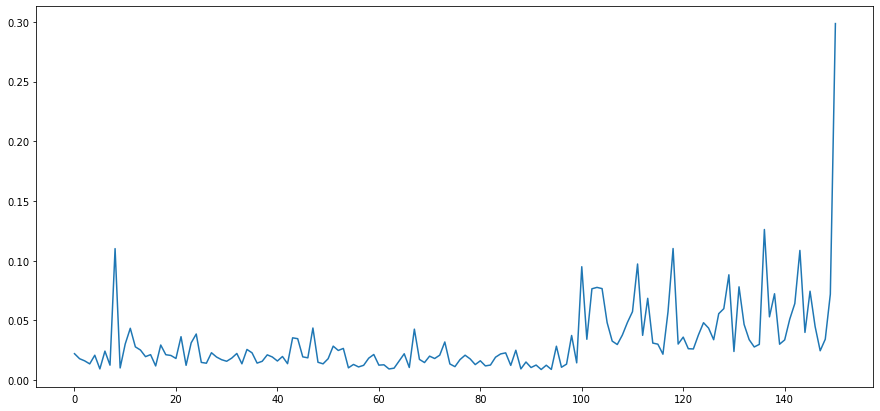

In [ ]:
# create model
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(df_scaled)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df_scaled)

# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
print('distances')
print(distances)
print('mean distance')
distances_mean



(array([79., 46., 11.,  8.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.]),
 array([0.        , 0.02333333, 0.04666667, 0.07      , 0.09333333,
        0.11666667, 0.14      , 0.16333333, 0.18666667, 0.21      ,
        0.23333333, 0.25666667, 0.28      , 0.30333333, 0.32666667,
        0.35      ]),
 <a list of 15 Patch objects>)

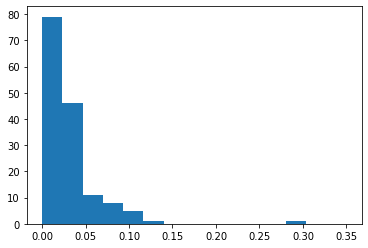

In [ ]:
#plot histo
plt.hist(distances_mean, bins=15, range=[0,0.35])

In [ ]:
for a in distances_mean.index:
  if (distances_mean[a])>0.25:
    print('index of the anomaly :', a)


index of the anomaly : 150


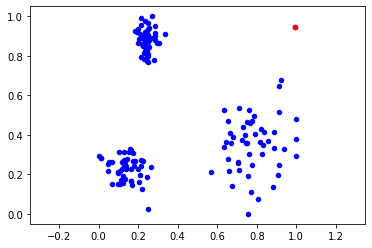

In [ ]:
  plt.scatter(df_scaled[0].values, df_scaled[1].values, s=20, c='blue')
  plt.scatter(df_scaled[0][a], df_scaled[1][a], s=20, c='red')
  plt.axis('equal')
  plt.show()